# 1 - Data wrangling

In [46]:
#Importando as principais bibliotecas para iniciarmos as análises
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.formula.api import ols
# ignorando os warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Carregaremos o primeiro banco de dados Patient Health Questionnaire-9 e visualizamos as primeiras 5 linhas
df1 = pd.read_csv('data/DEMO_PHQ.csv')
df1.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0


In [3]:
#Carregaremos o primeiro banco de dados Healthy Eating Index e visualizamos as primeiras 5 linhas
df2 = pd.read_csv('data/PAG_HEI.csv')
df2.head()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.0,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.0,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


In [4]:
#Iremos imprimir o tamanho dos 2 banco de dados
print(f'O Bando de dados DEMO_PHQ.csv possui {df1.shape[0]} linhas e {df1.shape[1]} variáveis')
print(f'O Bando de dados PAG_HEI.csv possui {df2.shape[0]} linhas e {df2.shape[1]} variáveis')

O Bando de dados DEMO_PHQ.csv possui 5334 linhas e 15 variáveis
O Bando de dados PAG_HEI.csv possui 9424 linhas e 17 variáveis


In [5]:
#Verificando quais veriaveis apresentam valores nulos e quantos valores nulos temos
print(f'Valores nulos do banco de dados DEMO_PHQ.csv {df1.isnull().sum().sum()} nulos')
print(f'Valores nulos do banco de dados PAG_HEI.csv {df2.isnull().sum().sum()} nulos')

Valores nulos do banco de dados DEMO_PHQ.csv 4529 nulos
Valores nulos do banco de dados PAG_HEI.csv 16798 nulos


In [6]:
#Criar um dicionário para tratamento das variáveis categóricas
quiz = { 0.0 : 'Nenhuma vez',
         1.0 : 'Menos de uma semana',
         2.0 : 'Uma semana ou mais',
         3.0 : 'Quase todos os dias',
         7.0 : 'Se recusou a responde',
         9.0 : 'Não sabe'}

genero = { 1 : 'Masculino',
          2 : 'Feminino' }

etnia = {1 : 'Branco nao Hispanico',
         2 : 'Negro nao Hispanico',
         3 : 'Mexicano-Americano',
         4 : 'Outro',
         5 : 'Outro-Hispanico'}

escolaridade = {1 : 'Menor que 9o ano',
                2 : '9-12o ano',
                3 : 'Ensino medio',
                4 : 'Ensino superior incompleto',
                5 : 'Superior completo ou maior',
                7 : 'Se recusou a responder',
                9 : 'Nao sabe'}

atividade = {1.0 : 'Baixo', #< 150 min/semana
             2.0 : 'Adequado',#150-300 min/semana
             3.0 : 'Acima'} #> 300 min/semana

In [7]:
# Vamos criar a variável phq9 que é o score do questionário
colunas_quiz = ['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090']
df1['phq9'] = df1[colunas_quiz].sum(axis=1).astype('int64')

In [8]:
'''Vamos criar um grupo para os sintomas escalando conforme abaixo:

0 - ph9 < 5              : (“sem sintomas”)
1 - ph9 >= 5 e ph9 < 10  : (“sintomas leves”)
2 - ph9 >= 10 e ph9 < 15 : (“sintomas moderados”)
3 - ph9 >= 15 e ph9 < 19 : (“sintomas moderadamente severos”)
4 - ph9 >= 20            : (“sintomas severos”)'''

labels = ['sem sintomas', 'sintomas leves', 'sintomas moderados', 'sintomas moderadamente severos', 'sintomas severos']
bins = [-1,4,9,14,19,df1['phq9'].max()]
df1['phq_grp'] = pd.cut(df1['phq9'], labels = labels, bins = bins)

In [9]:
#Criação de um loop para tratar as variáveis categóricas das perguntas
for coluna in colunas_quiz:
    df1[coluna] = df1[coluna].map(quiz)
df1.isnull().sum()

SEQN          0
DPQ010      498
DPQ020      498
DPQ030      498
DPQ040      498
DPQ050      498
DPQ060      498
DPQ070      498
DPQ080      498
DPQ090      498
RIAGENDR      0
RIDAGEYR      0
RIDRETH1      0
DMDEDUC       0
INDFMINC     47
phq9          0
phq_grp       0
dtype: int64

In [10]:
#Tratando o restante das variáveis categóricas
df1['RIAGENDR'] = df1['RIAGENDR'].map(genero)
df1['RIDRETH1'] = df1['RIDRETH1'].map(etnia)
df1['DMDEDUC'] = df1['DMDEDUC'].map(escolaridade)
df2['ADHERENCE'] = df2['ADHERENCE'].map(atividade)

In [11]:
# Vamos Unir os dois bancos de dados 
dataset = pd.merge(left = df1, right = df2, on = 'SEQN')

In [12]:
#Vamos exportar o novo dataset para armazenarmos em um arquivo na base de dados
dataset.to_csv('data/dataset.csv', index=False, sep = ',')

In [13]:
'''Qualquer valor nulo que seja adotado nas variáveis que influenciam nos sintomas de depressão dos pacientes, 
podemos criar um resultado falso ou tendencioso, sendo assim optamos por excluir as linhas nulas das 9 variáveis
das perguntas de depressão'''
dataset.dropna(axis = 0, how = 'all', subset='DPQ010', inplace=True)
dataset.isna().sum()

SEQN                         0
DPQ010                       0
DPQ020                       0
DPQ030                       0
DPQ040                       0
DPQ050                       0
DPQ060                       0
DPQ070                       0
DPQ080                       0
DPQ090                       0
RIAGENDR                     0
RIDAGEYR                     0
RIDRETH1                     0
DMDEDUC                      0
INDFMINC                    36
phq9                         0
phq_grp                      0
PAG_MINW                     0
ADHERENCE                    0
HEI2015C1_TOTALVEG          99
HEI2015C2_GREEN_AND_BEAN    99
HEI2015C3_TOTALFRUIT        99
HEI2015C4_WHOLEFRUIT        99
HEI2015C5_WHOLEGRAIN        99
HEI2015C6_TOTALDAIRY        99
HEI2015C7_TOTPROT           99
HEI2015C8_SEAPLANT_PROT     99
HEI2015C9_FATTYACID         99
HEI2015C10_SODIUM           99
HEI2015C11_REFINEDGRAIN     99
HEI2015C12_SFAT             99
HEI2015C13_ADDSUG           99
HEI2015_

In [14]:
''' Para as variáveis da alimentação adotaremos a média da população, a disponibilidade da dieta da população seria 
próxima uma vez que a disponibilidade do supermercado e o tipo de alimentação diário é simliar, portanto iremos preencher
todas as variáveis de alimentação de nulas para a média.'''

variaveis_alimentacao = ['HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT',
                         'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT',
                         'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT',
                         'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE']
for var in variaveis_alimentacao:
    dataset[var] = dataset[var].fillna(dataset[var].mean())

In [15]:
# Para a variável de salário iremos adotar a moda, seria onde a maior incidência salarial da pesquisa está
dataset['INDFMINC'].fillna(dataset['INDFMINC'].mode()[0], inplace = True)

In [16]:
print(f'O valor das variáveis nulas é {dataset.isna().sum().sum()}')

O valor das variáveis nulas é 0


In [17]:
#Vamos transformar todas as variáveis object em categoricas
variaveis_categoricas = list(dataset.dtypes[dataset.dtypes == 'object'].index)
for var in variaveis_categoricas:
    dataset[var] = dataset[var].astype('category')
dataset.dtypes.index

Index(['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'DMDEDUC', 'INDFMINC', 'phq9', 'phq_grp', 'PAG_MINW', 'ADHERENCE',
       'HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN',
       'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN',
       'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT',
       'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN',
       'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE'],
      dtype='object')

# 2 - EDA

In [18]:
# Para garatirmos a somatoria da variável HEI2015_TOTAL_SCORE esteja em acordo com a alimentação,
# iremos fazer a somatória e substituir no dataset
lista_alimentacao = ['HEI2015C1_TOTALVEG',
                     'HEI2015C2_GREEN_AND_BEAN',
                     'HEI2015C3_TOTALFRUIT',
                     'HEI2015C4_WHOLEFRUIT',
                     'HEI2015C5_WHOLEGRAIN',
                     'HEI2015C6_TOTALDAIRY',
                     'HEI2015C7_TOTPROT',
                     'HEI2015C8_SEAPLANT_PROT',
                     'HEI2015C9_FATTYACID',
                     'HEI2015C10_SODIUM',
                     'HEI2015C11_REFINEDGRAIN',
                     'HEI2015C12_SFAT',
                     'HEI2015C13_ADDSUG']
dataset['HEI2015_TOTAL_SCORE'] = dataset[lista_alimentacao].sum(axis = 1)

In [19]:
#Vamos usar o Dataset tratado somente com as informações que irão compor a análise para facilitar a visualização
dataset = dataset[['SEQN','RIAGENDR', 'RIDAGEYR', 'RIDRETH1','DMDEDUC', 'INDFMINC', 'phq9', 'phq_grp',
                    'PAG_MINW', 'ADHERENCE', 'HEI2015_TOTAL_SCORE']]
dataset.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,phq9,phq_grp,PAG_MINW,ADHERENCE,HEI2015_TOTAL_SCORE
1,31131,Feminino,44,Outro,Ensino superior incompleto,11.0,0,sem sintomas,264.711316,Adequado,35.553899
2,31132,Masculino,70,Mexicano-Americano,Superior completo ou maior,11.0,0,sem sintomas,1353.348730,Acima,63.551696
3,31134,Masculino,73,Mexicano-Americano,Ensino medio,12.0,0,sem sintomas,1011.478060,Acima,42.886826
4,31139,Feminino,18,Negro nao Hispanico,Ensino medio,11.0,4,sem sintomas,1729.145497,Acima,47.074393
5,31143,Masculino,19,Mexicano-Americano,Ensino superior incompleto,11.0,6,sintomas leves,3768.083141,Acima,46.086131


In [20]:
'''Fazendo uma análise bivariada do score de alimentação e do tempo acumulado semanal de atividade física reagrupando por
sexo e sintomas de depressão'''
dataset.groupby(['RIAGENDR', 'phq_grp'])[['HEI2015_TOTAL_SCORE',
                             'PAG_MINW', 'RIAGENDR']].aggregate(['mean', 'var', 'std']).round(2).rename(columns = {'HEI2015_TOTAL_SCORE':'Score',
                             'PAG_MINW':'Atividade Semanal'})

Score                 \
                                           mean     var    std   
RIAGENDR  phq_grp                                                
Feminino  sem sintomas                    51.34  158.06  12.57   
          sintomas leves                  49.86  152.38  12.34   
          sintomas moderados              48.47  112.28  10.60   
          sintomas moderadamente severos  45.89  109.77  10.48   
          sintomas severos                46.68  189.21  13.76   
Masculino sem sintomas                    49.17  143.96  12.00   
          sintomas leves                  47.74  118.13  10.87   
          sintomas moderados              48.67  155.39  12.47   
          sintomas moderadamente severos  48.84  113.10  10.63   
          sintomas severos                51.82  217.84  14.76   

                                         Atividade Semanal              \
                                                      mean         var   
RIAGENDR  phq_grp                                                        
Feminino  sem sintomas                              430.39   473792.84   
          sintomas leves                            387.74   540799.40   
          sintomas moderados                        229.11   145809.72   
          sintomas moderadamente severos            176.11    68429.99   
          sintomas severos                          379.34  1273407.73   
Masculino sem sintomas                              575.47   793975.18   
          sintomas leves                            591.49   911642.86   
          sintomas moderados                        363.00   452842.31   
          sintomas moderadamente severos            297.82   478897.20   
          sintomas severos                          277.31   573595.75   

                                                   
                                              std  
RIAGENDR  phq_grp                                  
Feminino  sem sintomas                     688.33  
          sintomas leves                   735.39  
          sintomas moderados               381.85  
          sintomas moderadamente severos   261.59  
          sintomas severos                1128.45  
Masculino sem sintomas                     891.05  
          sintomas leves                   954.80  
          sintomas moderados               672.94  
          sintomas moderadamente severos   692.02  
          sintomas severos                 757.36

Olhando as médias acima, entendemos que os homens tendem a se exercitar mais enquanto que as mulheres tendem a comer melhor

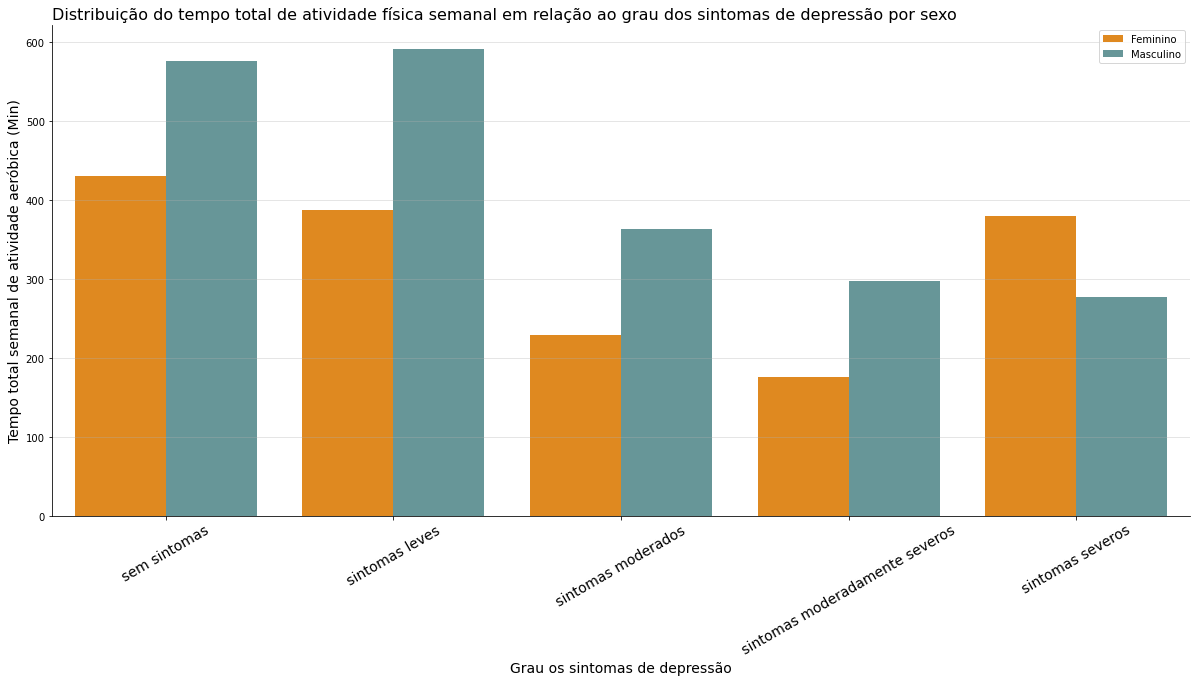

In [21]:
'''Contrução do gráfico de barras através da biblioteca Seaborn. Vamos fazer um comparativo entre o tempo de exercício
semanal versos sintomas versos sexo'''

ax = sns.catplot(x = 'phq_grp', y = 'PAG_MINW', hue = 'RIAGENDR', kind = 'bar', data = dataset, ci = 0, legend=False,
                 palette=['darkorange', 'cadetblue'])
ax.set_xlabels('Grau os sintomas de depressão', fontsize = 14)
ax.set_ylabels('Tempo total semanal de atividade aeróbica (Min)', fontsize = 14)
ax = plt.title('Distribuição do tempo total de atividade física semanal em relação ao grau dos sintomas de depressão por sexo',
              fontsize = 16, loc = 'left')
plt.legend(loc = 'upper right')
plt.xticks(rotation = 30, fontsize = 14)
plt.grid(visible = True, axis = 'y', alpha = 0.4)
ax.figure.set_size_inches (20,8)

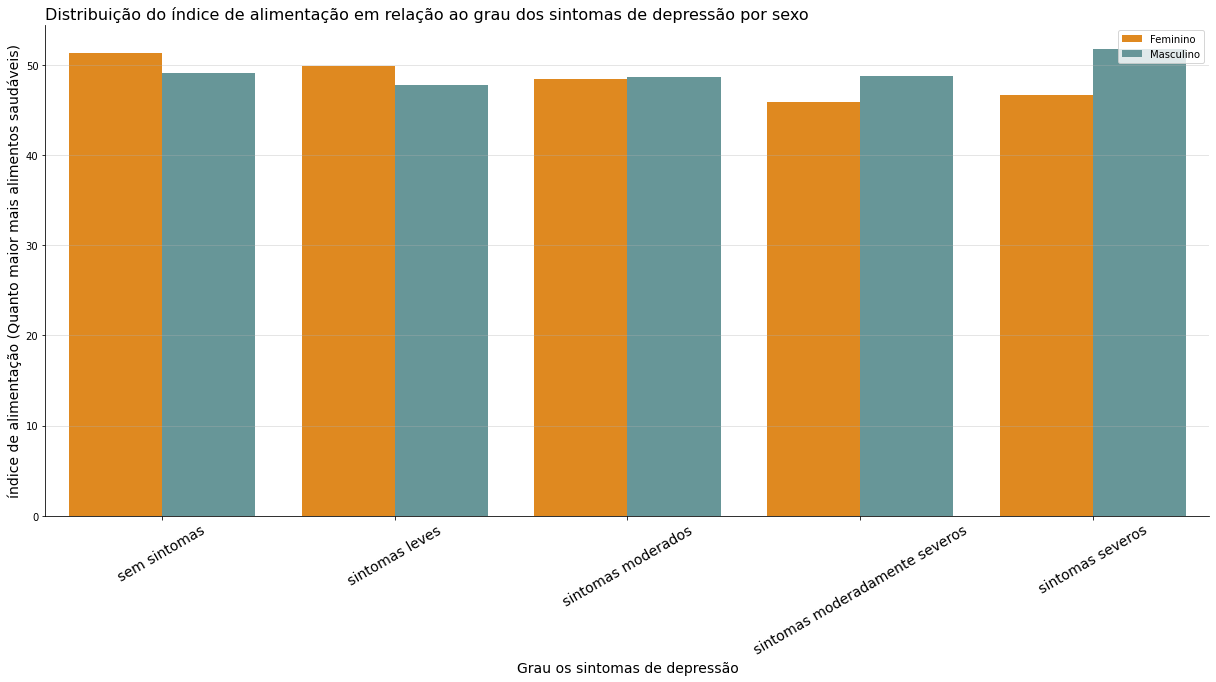

In [22]:
'''Contrução boxplot através da biblioteca Seaborn. Vamos fazer um comparativo entre o score de alimentação versos
sintomas versos sexo'''

ax = sns.catplot(x = 'phq_grp', y = 'HEI2015_TOTAL_SCORE', hue = 'RIAGENDR', kind = 'bar', data = dataset, ci = 0, legend=False,
                 palette=['darkorange', 'cadetblue'])
ax.set_xlabels('Grau os sintomas de depressão', fontsize = 14)
ax.set_ylabels('índice de alimentação (Quanto maior mais alimentos saudáveis)', fontsize = 14)
ax = plt.title('Distribuição do índice de alimentação em relação ao grau dos sintomas de depressão por sexo',
              fontsize = 16, loc = 'left')
plt.legend(loc = 'upper right')
plt.xticks(rotation = 30, fontsize = 14)
plt.grid(visible = True, axis = 'y', alpha = 0.4)
ax.figure.set_size_inches (20,8)

In [23]:
#Vamos criar 2 novas variáveis abrangende uma faixa etária e outra faixa salarial
labels = ['0-18', '19-30', '31-45', '46-55', '56-65', '66-mais']
bins = [0,18,30,45,55,65,100]
dataset['faixa_etaria'] = pd.cut(dataset['RIDAGEYR'], labels = labels, bins = bins)

In [24]:
#Para criarmos a faixa salarial, iremos mudar um pouco o critério
renda = {1.0 : '0-14999',
         2.0 : '0-14999',
         3.0 : '0-14999',
         4.0 : '15000-34999',
         5.0 : '15000-34999',
         6.0 : '15000-34999',
         7.0 : '35000-64999',
         8.0 : '35000-64999',
         9.0 : '35000-64999',
         10.0 : '65000-Mais',
         11.0 : '65000-Mais',
         12.0 : 'Maior que 20000',
         13.0 : 'Menor que 20000',
         77.0 : 'Sem Resposta',
         99.0 : 'Sem Resposta'}
dataset['INDFMINC'] = dataset['INDFMINC'].map(renda)

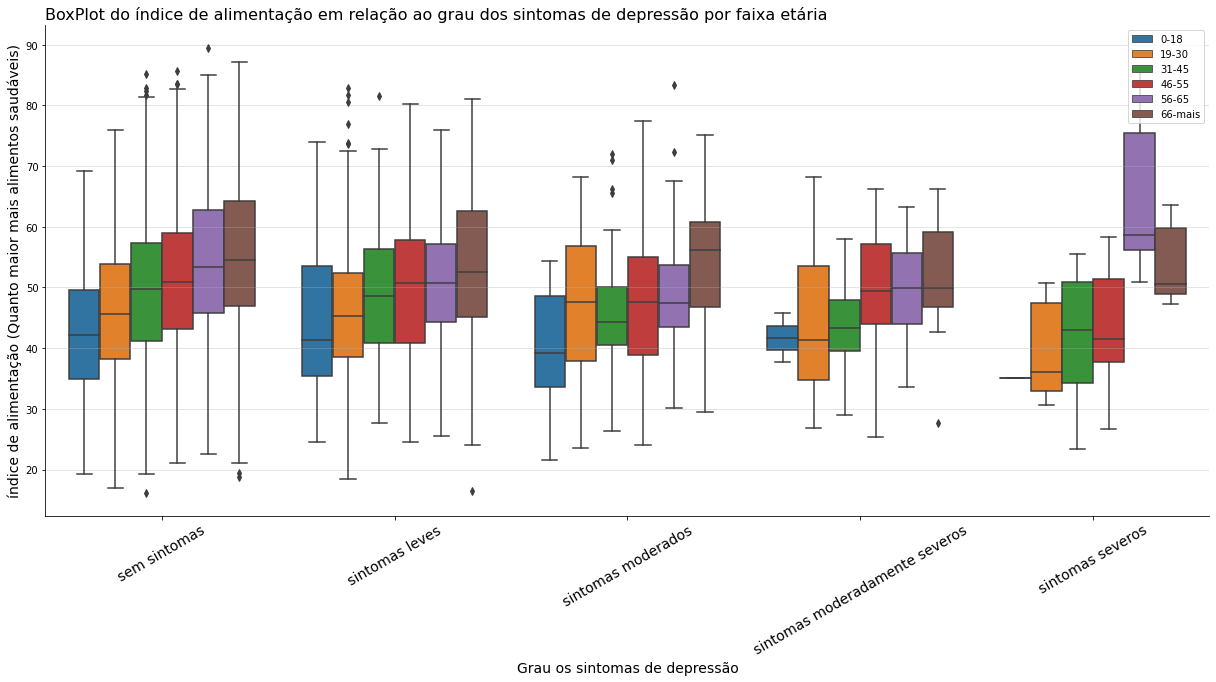

In [25]:
'''Contrução boxplot através da biblioteca Seaborn. Vamos fazer um comparativo entre o score de alimentação versos
sintomas versos faixa etária'''

ax = sns.catplot(x = 'phq_grp', y = 'HEI2015_TOTAL_SCORE', hue = 'faixa_etaria', kind = 'box', data = dataset, ci = 0,
                 legend=False)
ax.set_xlabels('Grau os sintomas de depressão', fontsize = 14)
ax.set_ylabels('índice de alimentação (Quanto maior mais alimentos saudáveis)', fontsize = 14)
ax = plt.title('BoxPlot do índice de alimentação em relação ao grau dos sintomas de depressão por faixa etária',
              fontsize = 16, loc = 'left')
plt.legend(loc = 'upper right')
plt.xticks(rotation = 30, fontsize = 14)
plt.grid(visible = True, axis = 'y', alpha = 0.4)
ax.figure.set_size_inches (20,8)

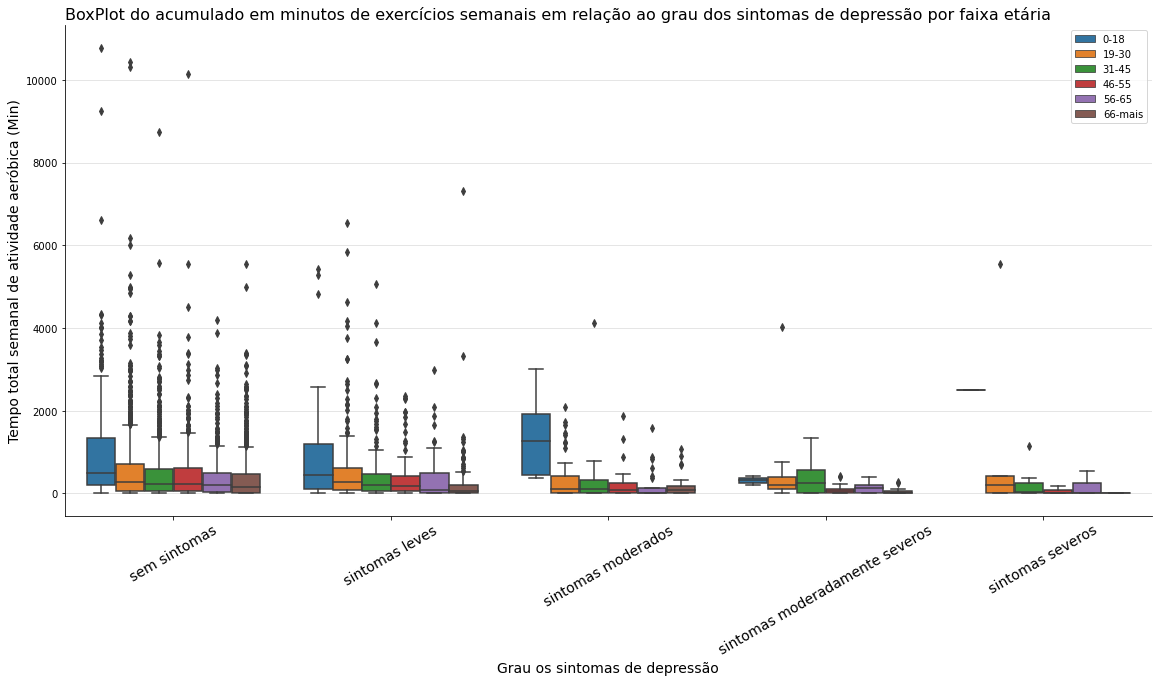

In [26]:
'''Contrução boxplot através da biblioteca Seaborn. Vamos fazer um comparativo entre o tempo semanal de exercícios versos
sintomas versos faixa etária'''

ax = sns.catplot(x = 'phq_grp', y = 'PAG_MINW', hue = 'faixa_etaria', kind = 'box', data = dataset, ci = 0,
                 legend=False)
ax.set_xlabels('Grau os sintomas de depressão', fontsize = 14)
ax.set_ylabels('Tempo total semanal de atividade aeróbica (Min)', fontsize = 14)
ax = plt.title('BoxPlot do acumulado em minutos de exercícios semanais em relação ao grau dos sintomas de depressão por faixa etária',
              fontsize = 16, loc = 'left')
plt.legend(loc = 'upper right')
plt.xticks(rotation = 30, fontsize = 14)
plt.grid(visible = True, axis = 'y', alpha = 0.4)
ax.figure.set_size_inches (20,8)

In [27]:
#Vamos analisar a variável de minutos
dataset.aggregate(['min', 'mean', 'median', 'max'])['PAG_MINW']

min           0.000000
mean        483.114915
median      219.359122
max       10777.829099
Name: PAG_MINW, dtype: float64

In [28]:
print(f"Valor acumulado de minutos semanais {round((int(dataset['PAG_MINW'].max()) / 60 / 24),2)} dias")

Valor acumulado de minutos semanais 7.48 dias


Ou seja a resposta acima nos mostra que a máxima de horas acumulada ultrapassa 7 dias da semana com isso temos outliers e iremos tratá-los

In [29]:
#Tratando os outliers para os alugueis
q1 = dataset['PAG_MINW'].quantile(0.25)
mediana = dataset['PAG_MINW'].quantile(0.50)
q3 = dataset['PAG_MINW'].quantile(0.75)
IIQ = q3 - q1
lim_inf = q1 - (1.5*IIQ)
lim_sup = q1 + (1.5*IIQ)

In [30]:
dataset = dataset[(dataset['PAG_MINW'] < lim_sup) & (dataset['PAG_MINW'] > lim_inf)]

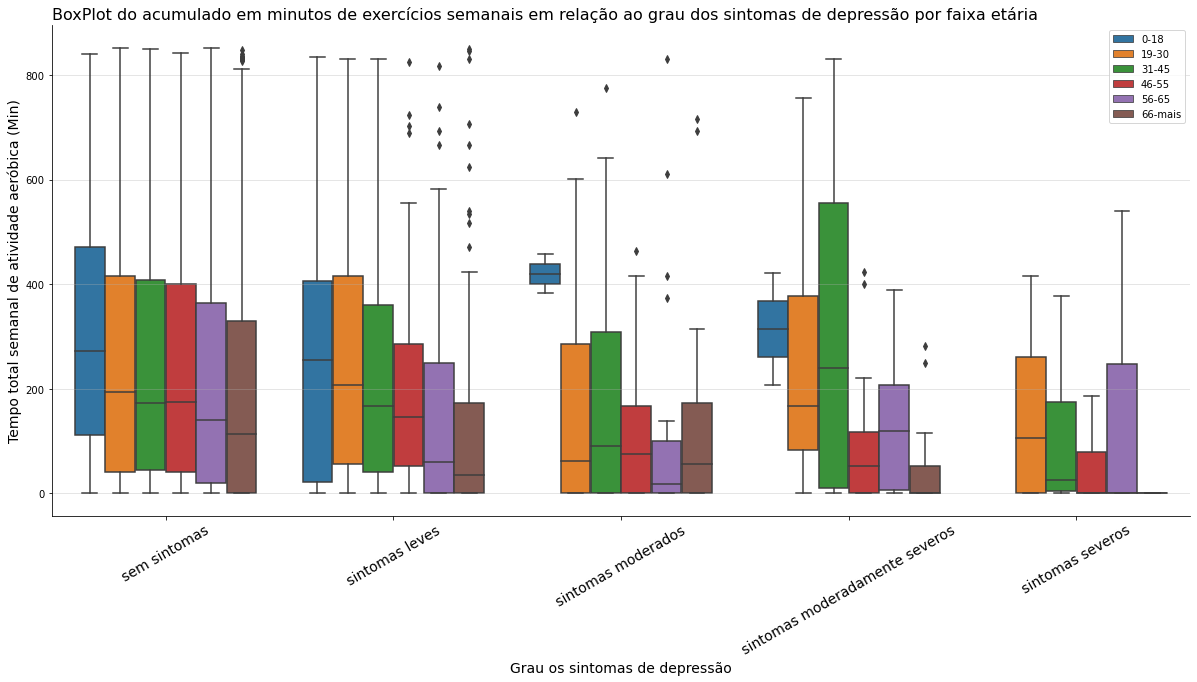

In [31]:
'''Contrução boxplot através da biblioteca Seaborn. Vamos fazer um comparativo entre o tempo semanal de exercícios versos
sintomas versos faixa etária (Sem Outliers)'''

ax = sns.catplot(x = 'phq_grp', y = 'PAG_MINW', hue = 'faixa_etaria', kind = 'box', data = dataset, ci = 0,
                 legend=False)
ax.set_xlabels('Grau os sintomas de depressão', fontsize = 14)
ax.set_ylabels('Tempo total semanal de atividade aeróbica (Min)', fontsize = 14)
ax = plt.title('BoxPlot do acumulado em minutos de exercícios semanais em relação ao grau dos sintomas de depressão por faixa etária',
              fontsize = 16, loc = 'left')
plt.legend(loc = 'upper right')
plt.xticks(rotation = 30, fontsize = 14)
plt.grid(visible = True, axis = 'y', alpha = 0.4)
ax.figure.set_size_inches (20,8)

Olhando os gráficos acima, entendemos que as atividades aeróbicas tem a tendência de diminuir os efeitos da depressão. Podemos ainda tirar a conclusão de que os homens no geral se exercítam melhor que as mulheres.
Já a questão de alimentação saudável, não mostra muito relevante nos sintomas da depressão, porém notamos que com o aumento da idade tende a ter uma alimentação mais adequada tendo um score crescente de 18 anos acima.

In [32]:
'''Fazendo uma análise bivariada do score de alimentação e do tempo acumulado semanal de atividade física reagrupando por
sexo e sintomas de depressão'''
dataset.groupby(['RIAGENDR', 'phq_grp'])[['HEI2015_TOTAL_SCORE',
                             'PAG_MINW', 'RIAGENDR']].aggregate(['mean', 'var', 'std']).round(2)

HEI2015_TOTAL_SCORE                 \
                                                        mean     var    std   
RIAGENDR  phq_grp                                                             
Feminino  sem sintomas                                 51.06  151.74  12.32   
          sintomas leves                               50.13  156.85  12.52   
          sintomas moderados                           48.42  111.31  10.55   
          sintomas moderadamente severos               46.26  105.74  10.28   
          sintomas severos                             47.08  196.79  14.03   
Masculino sem sintomas                                 48.92  140.68  11.86   
          sintomas leves                               47.96  118.71  10.90   
          sintomas moderados                           48.84  152.04  12.33   
          sintomas moderadamente severos               49.03  115.44  10.74   
          sintomas severos                             53.48  208.08  14.43   

                                         PAG_MINW                    
                                             mean       var     std  
RIAGENDR  phq_grp                                                    
Feminino  sem sintomas                     219.24  50505.50  224.73  
          sintomas leves                   201.86  47256.58  217.39  
          sintomas moderados               146.79  38920.44  197.28  
          sintomas moderadamente severos   150.98  39604.47  199.01  
          sintomas severos                 110.38  25069.53  158.33  
Masculino sem sintomas                     248.77  57229.82  239.23  
          sintomas leves                   222.11  56009.60  236.66  
          sintomas moderados               140.47  30517.34  174.69  
          sintomas moderadamente severos   184.61  44425.74  210.77  
          sintomas severos                  54.24  29181.29  170.83

In [33]:
#Vamos fazer 2 datasets, para feminino e masculino, contendo o sintomas, o Score total e a PAG_MINW
df_feminino = dataset[dataset['RIAGENDR'] =='Feminino']
df_masculino = dataset[dataset['RIAGENDR'] =='Masculino']

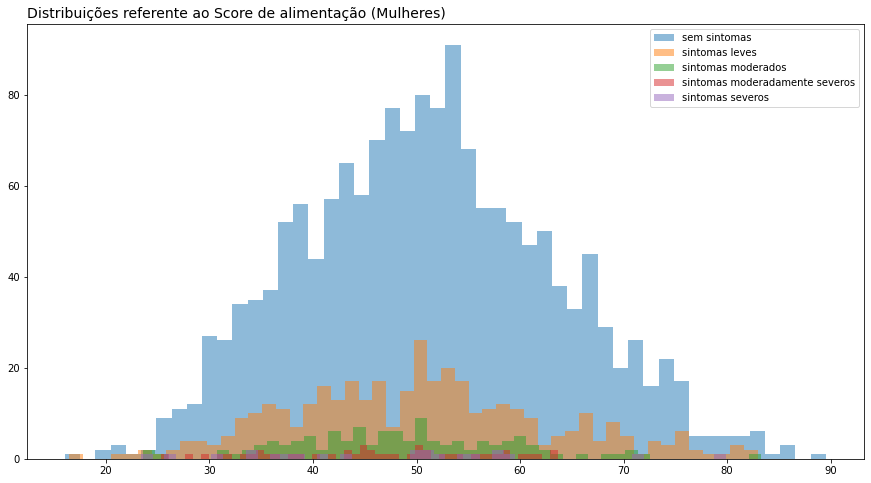

In [34]:
plt.figure(figsize=(15,8))
for i in list(df_feminino['phq_grp'].unique()):
    ax = plt.hist(df_feminino[df_feminino['phq_grp'] == i]['HEI2015_TOTAL_SCORE'], alpha = 0.5, bins = 50, label=i)
plt.legend()
plt.title('Distribuições referente ao Score de alimentação (Mulheres)', fontsize = 14, loc = 'left')
ax = ax

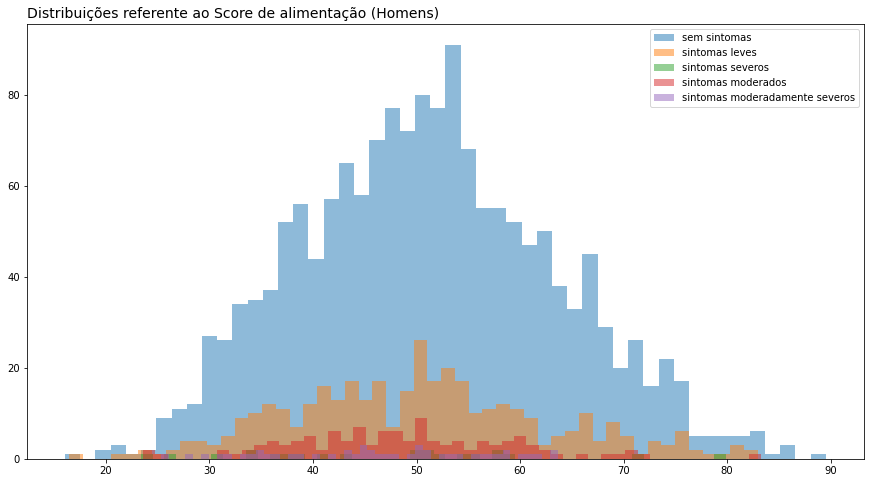

In [70]:
plt.figure(figsize=(15,8))
for i in list(df_masculino['phq_grp'].unique()):
    ax = plt.hist(df_feminino[df_feminino['phq_grp'] == i]['HEI2015_TOTAL_SCORE'], alpha = 0.5, bins = 50, label=i)
plt.legend()
plt.title('Distribuições referente ao Score de alimentação (Homens)', fontsize = 14, loc = 'left')
ax = ax

In [71]:
# fazendo o teste de normalidade de shapiro
stats.shapiro(df_feminino['HEI2015_TOTAL_SCORE'])

ShapiroResult(statistic=0.995100736618042, pvalue=1.4679544619866647e-06)

### Teste de Shapiro_Wilks

O test shapiro-wilks é um indicador de quão bem os nossos dados se ajustam à distribuição normal. O primeiro parâmetro da estatística W (quando está próxiomo de 1 a distribuição é Gaussiana), e o segundo parâmetro é o p_valor (quando p_valor é maior que 0.05, a distribuição é Gaussiana).

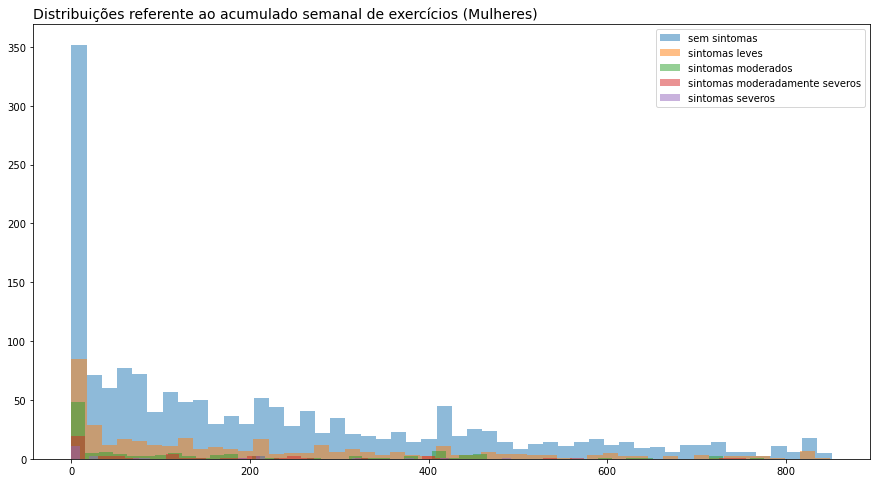

In [35]:
plt.figure(figsize=(15,8))
for i in list(df_feminino['phq_grp'].unique()):
    ax = plt.hist(df_feminino[df_feminino['phq_grp'] == i]['PAG_MINW'], alpha = 0.5, bins = 50, label=i)
plt.legend()
plt.title('Distribuições referente ao acumulado semanal de exercícios (Mulheres)', fontsize = 14, loc = 'left')
ax = ax

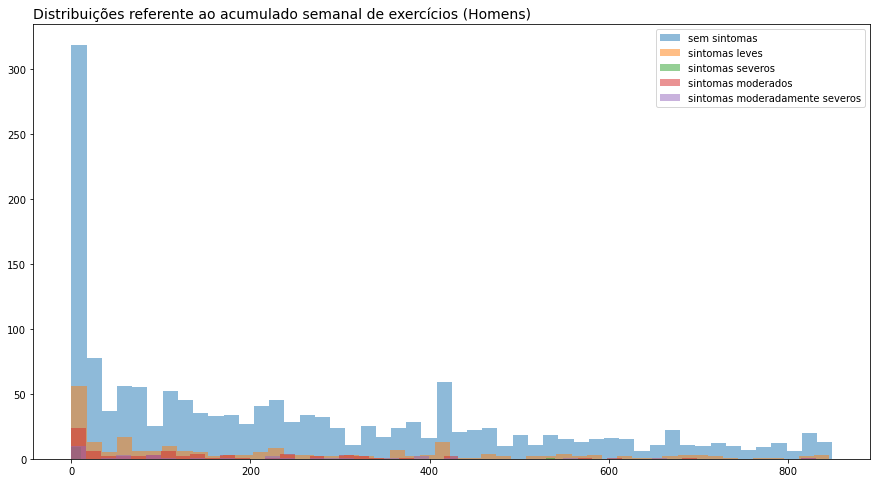

In [37]:
plt.figure(figsize=(15,8))
for i in list(df_masculino['phq_grp'].unique()):
    ax = plt.hist(df_masculino[df_masculino['phq_grp'] == i]['PAG_MINW'], alpha = 0.5, bins = 50, label=i)
plt.legend()
plt.title('Distribuições referente ao acumulado semanal de exercícios (Homens)', fontsize = 14, loc = 'left')
ax = ax

Analisando as distribuições acima, vemos que a alimentação tem uma curva normal comprovada pelo teste de Shapiro para ambos os sexos porém, o acumulado semanal de exercícios apresenta uma curva positiva não normal. 

In [38]:
#Vamos aplicar o logaritimo para transformar os dados para uma curva normal
df_feminino['PAG_MINW'].mask(df_feminino['PAG_MINW'] == 0, 1, inplace=True)
df_masculino['PAG_MINW'].mask(df_masculino['PAG_MINW'] == 0, 1, inplace=True)
df_feminino['PAG_MINW_LOG'] = np.log(df_feminino['PAG_MINW'])
df_masculino['PAG_MINW_LOG'] = np.log(df_masculino['PAG_MINW'])

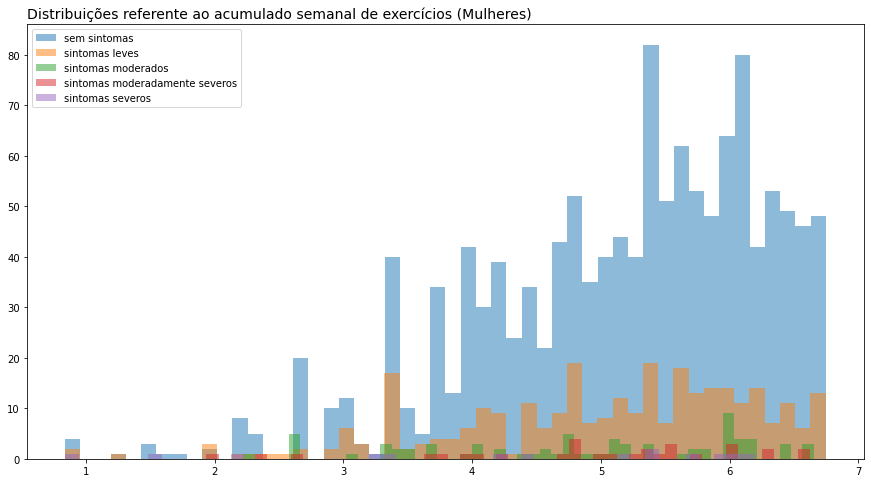

In [39]:
plt.figure(figsize=(15,8))
for i in list(df_feminino['phq_grp'].unique()):
    ax = plt.hist(df_feminino[(df_feminino['phq_grp'] == i) & (df_feminino['PAG_MINW_LOG'] != 0)]['PAG_MINW_LOG'], alpha = 0.5, bins = 50, label=i)
plt.legend()
plt.title('Distribuições referente ao acumulado semanal de exercícios (Mulheres)', fontsize = 14, loc = 'left')
ax = ax

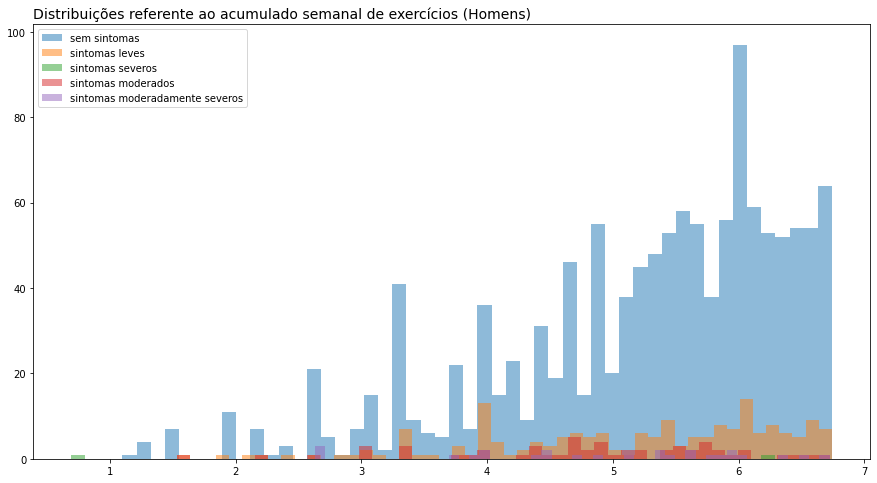

In [40]:
plt.figure(figsize=(15,8))
for i in list(df_masculino['phq_grp'].unique()):
    ax = plt.hist(df_masculino[(df_masculino['phq_grp'] == i) & (df_masculino['PAG_MINW_LOG'] != 0)]['PAG_MINW_LOG'], alpha = 0.5, bins = 50, label=i)
plt.legend()
plt.title('Distribuições referente ao acumulado semanal de exercícios (Homens)', fontsize = 14, loc = 'left')
ax = ax

# 3 - Testes de hipóteses

<b><u>Primeiro Teste:</b></u><br>
H0: Mais Atividade aeróbica menos Sintomas de Depressão<br><br>
<b><u>Segundo Teste:</b></u><br>
H0: Melhor Alimentação menos Sintomas de Depressão<br>

In [41]:
# Aplicando ANOVA para a segunda hipótese, uma vez que ele é uma distribuição normal
# Grupo Feminino
fvalue, pvalue = (df_feminino[df_feminino.phq_grp == 'sem sintomas']['HEI2015_TOTAL_SCORE'],
                                df_feminino[df_feminino.phq_grp == 'sintomas leves']['HEI2015_TOTAL_SCORE'],
                                df_feminino[df_feminino.phq_grp == 'sintomas moderados']['HEI2015_TOTAL_SCORE'],
                                df_feminino[df_feminino.phq_grp == 'sintomas moderadamente severos']['HEI2015_TOTAL_SCORE'],
                                df_feminino[df_feminino.phq_grp == 'sintomas severos']['HEI2015_TOTAL_SCORE']
                               )
print(fvalue, pvalue)

3.535405867941545 0.006976258547017392


In [73]:
print(df_feminino[df_feminino.phq_grp == 'sem sintomas']['HEI2015_TOTAL_SCORE'].shape, df_feminino[df_feminino.phq_grp == 'sintomas leves']['HEI2015_TOTAL_SCORE'].shape, df_feminino[df_feminino.phq_grp == 'sintomas moderados']['HEI2015_TOTAL_SCORE'].shape, df_feminino[df_feminino.phq_grp == 'sintomas moderadamente severos']['HEI2015_TOTAL_SCORE'].shape, df_feminino[df_feminino.phq_grp == 'sintomas severos']['HEI2015_TOTAL_SCORE'].shape)

(1603,) (380,) (116,) (46,) (22,)
